### <b>3분 만에 전이 학습(Transfer Learning)을 활용한 인공지능 서비스 만들기</b>

* 본 프로젝트에서는 세 가지 기능을 합쳐서 순식간에 상용 인공지능 서비스를 제작합니다.
    1. 이미지 크롤링(image crawling) 혹은 크롤링 라이브러리
    2. 전이 학습(transfer learning)
    3. 웹 API 개발
* 이 프로젝트에서 만들어 볼 것은 <b>마동석/김종국/이병헌</b> 분류기(classifier)입니다.
* 단 <b>3분</b> 만에 인공지능 개발의 전체 과정을 진행합니다.
    * 데이터 수집/정제
    * 인공지능 모델 학습
    * 학습된 모델 배포
* 한글 폰트 설치 이후에 <b>[런타임] - [런타임 다시 시작]</b>을 수행해야 합니다.

In [ ]:
# 한글 폰트 설치하기 (꼭! 설치가 완료되면 [런타임 다시 시작]을 누르고 다시 실행하기)
!apt install fonts-nanum -y

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')

In [ ]:
# 필요한 라이브러리 설치하기
!git clone https://github.com/ndb796/bing_image_downloader

fatal: destination path 'bing_image_downloader' already exists and is not an empty directory.


# 분석

1.1 이미지 트레이닝 셋

In [ ]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader


directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

In [ ]:
query = '1명'
dataset_split(query, 85) 

[Train Dataset] Spring Style for Men_ Style Inspiration & a Shopping List.jpeg
[Train Dataset] The Best Men's Street Style from New York Fashion Week.jpeg
[Train Dataset] save = follow me 💖_@donnarachel.jpeg
[Train Dataset] ONCE IN MY LIFE 마리끌레르 -.jpeg
[Train Dataset] The 10 Best-Dressed Men of the Week.jpeg
[Train Dataset] Image in look collection by Private User on We Heart It.jpeg
[Train Dataset] 43b0b3ea-fa22-4e68-91c0-7d5f32eec763.jpeg
[Train Dataset] Sweater.jpeg
[Train Dataset] 9 Basic Style Tips Every Teenage Guy Should Follow.jpeg
[Train Dataset] 2d86a0f3-1294-46b0-86d1-179c97575bcb.jpeg
[Train Dataset] f9dd7696-d305-4cf7-aa45-2613479f012b.jpeg
[Train Dataset] Meet Our Newest GMG Team Member - Julia Berolzheimer.jpeg
[Train Dataset] c86007ba-386c-4e4c-9b90-ab533e36bac4.jpeg
[Train Dataset] 44360bb8-0936-43f8-91ca-cea34704aaa5.jpeg
[Train Dataset] 微博轻享版.jpeg
[Train Dataset] ( 🍒 ).jpeg
[Train Dataset] i v o r y.jpeg
[Train Dataset] Copy These 8 Street Style Looks To Look S

In [ ]:
query = '2명'
dataset_split(query, 85) 

[Train Dataset] b120a376-fe2a-4d70-ad39-9ce4e161beed.jpeg
[Train Dataset] Dior's New Guard_ Maria Grazia Chiuri's Reign As Artistic Director.png
[Train Dataset] 유연석, 이연희의 다정한 쉼표.png
[Train Dataset] What Is Romantic Love_.jpeg
[Train Dataset] These Awesome Grandparents Just Changed The Wedding Photo Booth Game.jpeg
[Train Dataset] 94740734-1ac9-497e-b277-593caa97ebeb.jpeg
[Train Dataset] 신체에 있는 ㅍ ㄷ님의 핀 - 2022 _ 커플 사진 촬영, 사진 그리기, 액션 포즈.jpeg
[Train Dataset] Untitled — THINGS THAT MAKE YOUR PRIVATE PART SMELL AND TASTE_.jpeg
[Train Dataset] 크로키 자료실 on Twitter.png
[Train Dataset] 6qth.jpeg
[Train Dataset] 06bc80a7-dc54-4ffb-8527-71aa54d63eb2.jpeg
[Train Dataset] Dream Couple Vacation.jpeg
[Train Dataset] The Complete Guide to Summer Engagement Photos.jpeg
[Train Dataset] HYUN BIN AND SON YE JIN.jpeg
[Train Dataset] Picture of Rollo Weeks in The Queen of Shebas Pearls - ti4u_rw_qsp1_jpg.jpeg
[Train Dataset] Rain dance Babe.jpeg
[Tra

In [ ]:
query = '단체'
dataset_split(query, 85) 

[Train Dataset] 0132f809-a719-483a-a592-8f5e0be1b07a.jpeg
[Train Dataset] Nike Launch Atlético Nacional 2019 Lookbook - SoccerBible.jpeg
[Train Dataset] 39d5a4a4-4367-4da9-9215-66124d33921b.jpeg
[Train Dataset] 60926957-5507-46fd-b930-3221fbd5ce97.jpeg
[Train Dataset] 5182c602-ffee-424d-9b1a-1659fb74d0d1.png
[Train Dataset] 혜미 on Instagram @heymmm1.jpeg
[Train Dataset] 02ffc8c4-c23f-4895-ab33-beaee093c816.jpeg
[Train Dataset] Daily Paper's FW18 Lookbook Is All About the Bright and the Bold.jpeg
[Train Dataset] DEVYAA RAQUEEL.jpeg
[Train Dataset] Poison apple.jpeg
[Train Dataset] 0bc4021a-a109-401d-91fe-2632806695cf.jpeg
[Train Dataset] SS'19.jpeg
[Train Dataset] 방탄소년단.jpeg
[Train Dataset] 𝑩𝒍𝒂𝒄𝒌𝒑𝒊𝒏𝒌.jpeg
[Train Dataset] 67ec7bda-5eba-4370-b0ec-1a2ce4b8e46f.jpeg
[Train Dataset] 306aadcc-c81b-45a7-a735-e54b955e20cb.jpeg
[Train Dataset] The Kyra Girls.jpeg
[Train Dataset] 0e1f59ab-f396-4d9e-b875-4b238bd2c277.jpeg
[Train Dataset] color  _  LESYANEBO.png
[Train Dataset] K Daily 2

#### <b>1. 이미지 크롤링을 활용한 학습 이미지 수집</b>

* 수집한 이미지를 저장하기 위한 폴더를 생성하고, 필요한 함수를 정의합니다.

In [ ]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader


directory_list = [
    './custom_dataset/train/',
    './custom_dataset/test/',
]

# 초기 디렉토리 만들기
for directory in directory_list:
    if not os.path.isdir(directory):
        os.makedirs(directory)

# 수집한 이미지를 학습 데이터와 평가 데이터로 구분하는 함수
def dataset_split(query, train_cnt):
    # 학습 및 평가 데이터셋 디렉토리 만들기
    for directory in directory_list:
        if not os.path.isdir(directory + '/' + query):
            os.makedirs(directory + '/' + query)
    # 학습 및 평가 데이터셋 준비하기
    cnt = 0
    for file_name in os.listdir(query):
        if cnt < train_cnt:
            print(f'[Train Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/train/' + query + '/' + file_name)
        else:
            print(f'[Test Dataset] {file_name}')
            shutil.move(query + '/' + file_name, './custom_dataset/test/' + query + '/' + file_name)
        cnt += 1
    shutil.rmtree(query)

#### 이미지 크롤링을 통한 데이터셋 구축

In [ ]:
query = 'pinterest 독사진'
downloader.download(query, limit=100,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 85)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://i.pinimg.com/736x/fd/12/63/fd1263e833337a72ed8494a41e20f621.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://i.pinimg.com/originals/dc/a8/ff/dca8ffed872e06f200f6ddae5faf5d7f.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://i.pinimg.com/236x/ca/f3/4a/caf34acd973d144d9fbdbb2277f370e8.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://i.pinimg.com/originals/5e/ca/fe/5ecafeb10469831a0c07a526881a6478.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://i.pinimg.com/originals/3c/69/4e/3c694ef56c2068980630de419d6b91f9.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://i.pinimg.com/originals/9b/a0/9e/9ba09e537763cac7b3f13c36da349db8.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://i.pinimg.com/originals/c6/f5/03/c6f503a9a8761203bb82d0ad04cb2e5e.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://i.pinimg.com/736x/83/7b/bb/837bbb7f0d7dffeedc79187e75a18957.jpg)
#8 파일 다운로드가 완료되었습니다.
#9 이미지 다운로드 (https://i.pinimg.com/originals/44/b3/1c/44b31c

In [ ]:
query = 'two people'
downloader.download(query, limit=100,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 85)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://melmagazine.com/wp-content/uploads/2018/08/1oxynKBtB1XMm1nxfzXjJ2A.jpeg)
[Error] Invalid image, not saving https://melmagazine.com/wp-content/uploads/2018/08/1oxynKBtB1XMm1nxfzXjJ2A.jpeg
[Info] Issue getting: https://melmagazine.com/wp-content/uploads/2018/08/1oxynKBtB1XMm1nxfzXjJ2A.jpeg
[Error] No active exception to reraise
#1 이미지 다운로드 (https://st.focusedcollection.com/8860618/i/1800/focused_124364670-stock-photo-two-people-talking.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://images.creativemarket.com/0.1.0/ps/5787111/1820/1213/m1/fpnw/wm1/reaxzptidujtupuzvlkxntlrf9f8ejbnqib3r4pjvyct1jxiyyajmly7pp6knez9-.jpg?1548781527&amp;s=7ab6ffb3d1414f6cf27584fc6d555c58)
[Info] Issue getting: https://images.creativemarket.com/0.1.0/ps/5787111/1820/1213/m1/fpnw/wm1/reaxzptidujtupuzvlkxntlrf9f8ejbnqib3r4pjvyct1jxiyyajmly7pp6knez9-.jpg?1548781527&amp;s=7ab6ffb3d1414f6cf27584fc6d555c58
[Error] HTTP Error 404: Not Found

In [ ]:
query = 'background'
downloader.download(query, limit=100,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 85)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://www.wallpapers13.com/wp-content/uploads/2016/02/Background-lake-sky-reflecting-hd-wallpaper-15903.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (http://allhdwallpapers.com/wp-content/uploads/2015/07/A-Dreamy-World-2.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://www.wallpapers13.com/wp-content/uploads/2016/01/Waterfall-Wide-Desktop-Background-5374-1920x1440.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://www.wallpapers13.com/wp-content/uploads/2015/12/Forest-river-desktop-background-594036-1920x1440.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://www.wallpapers13.com/wp-content/uploads/2016/01/Forest-waterfall-desktop-background-496485-1920x1440.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (http://www.wallpapers13.com/wp-content/uploads/2015/12/Snoqualmie-River-In-Washington-At-Autumn-Hdr-HD-Desktop-Background-1920x1200.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (http://www.wallpapers13.com/wp-content/uploads/2016/01/Background

In [ ]:
query = 'three people'
downloader.download(query, limit=100,  output_dir='./', adult_filter_off=True, force_replace=False, timeout=60)
dataset_split(query, 85)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://www.vishopper.com/images/products/maxxmax/PE/11288_group-of-three-people-standing-and-looking-at-smth-on-the-phone.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://saintandrewsunitedchurch.org/wp-content/uploads/2013/03/three-people.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://images.cdn3.stockunlimited.net/preview1300/three-people-on-hiking-trip-portrait_1885205.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://images.cdn3.stockunlimited.net/preview1300/three-business-people-standing-together_1677957.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (http://thumbs.dreamstime.com/z/three-people-communicate-9225247.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://images0.westend61.de/0000431659pw/three-people-at-business-meeting-ZEF000880.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://media.gettyimages.com/photos/three-people-standing-together-close-up-picture-id200212303-001)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://thumb

#### <b>2. PyTorch를 이용한 전이 학습(Transfer Learning)</b>

* 전이 학습(transfer learning)의 동작 과정을 간략화한 것은 다음과 같습니다.

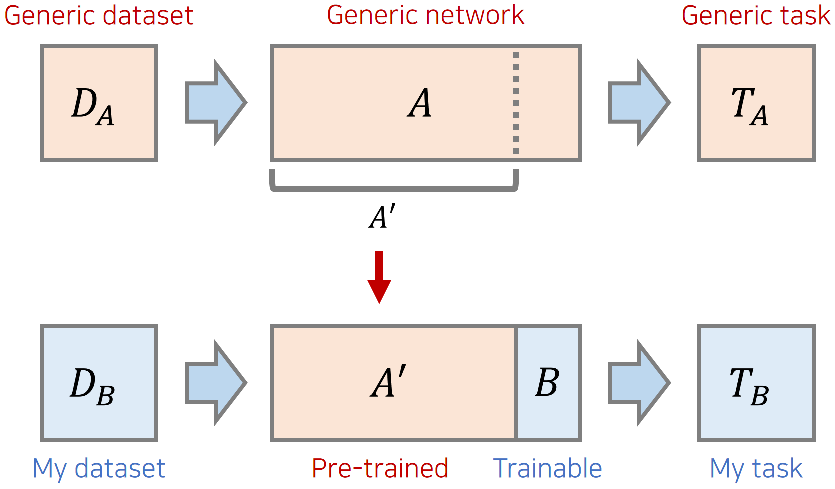

* 학습을 위해 필요한 라이브러리를 불러옵니다.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torchvision
from torchvision import datasets, models, transforms

import numpy as np
import time


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

* 데이터셋을 불러옵니다.

In [ ]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

data_dir = './custom_dataset'
train_datasets = datasets.ImageFolder(os.path.join(data_dir, 'train'), transforms_train)
test_datasets = datasets.ImageFolder(os.path.join(data_dir, 'test'), transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=5, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=5, shuffle=True, num_workers=4)

print('학습 데이터셋 크기:', len(train_datasets))
print('테스트 데이터셋 크기:', len(test_datasets))

class_names = train_datasets.classes
print('클래스:', class_names)

학습 데이터셋 크기: 255
테스트 데이터셋 크기: 75
클래스: ['1명', '2명', '단체']


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


* 간단히 이미지를 시각화해 봅시다.

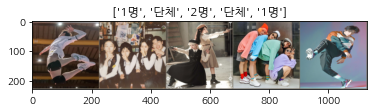

In [ ]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()


# 학습 데이터를 배치 단위로 불러오기
iterator = iter(train_dataloader)

# 현재 배치를 이용해 격자 형태의 이미지를 만들어 시각화
inputs, classes = next(iterator)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

* 학습할 CNN 딥러닝 모델 객체를 초기화합니다.

In [ ]:
model = models.resnet34(pretrained=True)
num_features = model.fc.in_features
# 전이 학습(transfer learning): 모델의 출력 뉴런 수를 4개로 교체하여 마지막 레이어 다시 학습
model.fc = nn.Linear(num_features, 3)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

* 학습을 진행합니다.

In [ ]:
num_epochs = 50
model.train()
start_time = time.time()

# 전체 반복(epoch) 수 만큼 반복하며
for epoch in range(num_epochs):
    running_loss = 0.
    running_corrects = 0

    # 배치 단위로 학습 데이터 불러오기
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 모델에 입력(forward)하고 결과 계산
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        # 역전파를 통해 기울기(gradient) 계산 및 학습 진행
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_datasets)
    epoch_acc = running_corrects / len(train_datasets) * 100.

    # 학습 과정 중에 결과 출력
    print('#{} Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() - start_time))

#0 Loss: 1.0246 Acc: 48.2353% Time: 16.3446s
#1 Loss: 0.4557 Acc: 82.7451% Time: 23.3016s
#2 Loss: 0.2772 Acc: 89.0196% Time: 31.5552s
#3 Loss: 0.3657 Acc: 86.6667% Time: 38.5378s
#4 Loss: 0.3514 Acc: 87.0588% Time: 47.2827s
#5 Loss: 0.2920 Acc: 90.1961% Time: 55.5591s
#6 Loss: 0.3658 Acc: 88.2353% Time: 63.2181s
#7 Loss: 0.3250 Acc: 85.0980% Time: 71.5277s
#8 Loss: 0.3010 Acc: 89.4118% Time: 78.5032s
#9 Loss: 0.3417 Acc: 86.6667% Time: 88.2015s
#10 Loss: 0.2327 Acc: 93.3333% Time: 96.5086s
#11 Loss: 0.2841 Acc: 90.9804% Time: 103.7160s
#12 Loss: 0.1131 Acc: 96.0784% Time: 112.0650s
#13 Loss: 0.2190 Acc: 92.5490% Time: 119.1283s
#14 Loss: 0.1953 Acc: 91.7647% Time: 127.2658s
#15 Loss: 0.1827 Acc: 93.7255% Time: 135.6718s
#16 Loss: 0.1330 Acc: 96.0784% Time: 142.7527s
#17 Loss: 0.1816 Acc: 92.9412% Time: 151.1697s
#18 Loss: 0.2270 Acc: 92.9412% Time: 158.2129s
#19 Loss: 0.1279 Acc: 94.9020% Time: 166.5169s
#20 Loss: 0.1244 Acc: 94.9020% Time: 174.3845s
#21 Loss: 0.0726 Acc: 98.0392% Tim

* 학습된 모델을 평가합니다.

[예측 결과: 1명] (실제 정답: 1명)


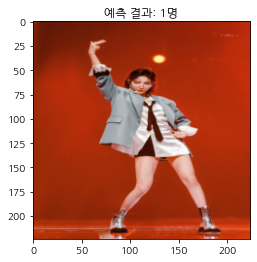

[예측 결과: 단체] (실제 정답: 단체)


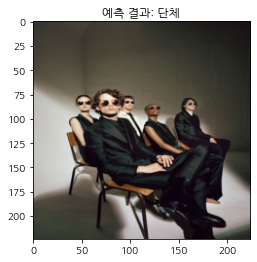

[예측 결과: 단체] (실제 정답: 단체)


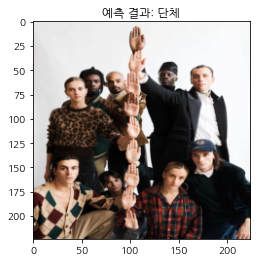

[예측 결과: 단체] (실제 정답: 단체)


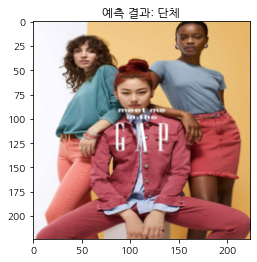

[예측 결과: 1명] (실제 정답: 2명)


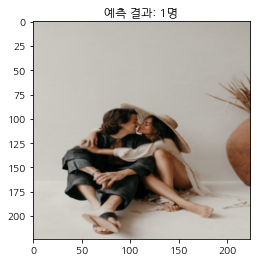

[예측 결과: 2명] (실제 정답: 2명)


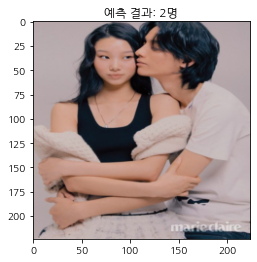

[예측 결과: 1명] (실제 정답: 2명)


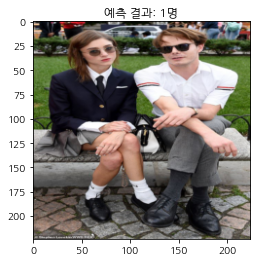

[예측 결과: 단체] (실제 정답: 단체)


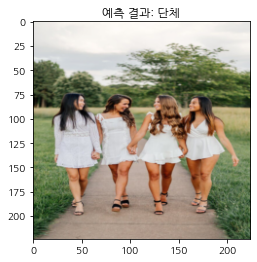

[예측 결과: 2명] (실제 정답: 단체)


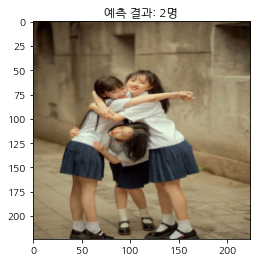

[예측 결과: 2명] (실제 정답: 2명)


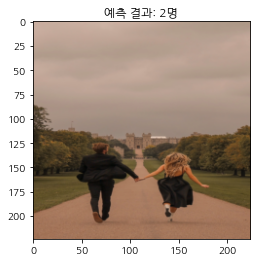

[예측 결과: 단체] (실제 정답: 단체)


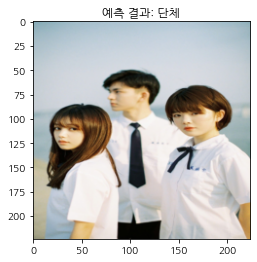

[예측 결과: 1명] (실제 정답: 1명)


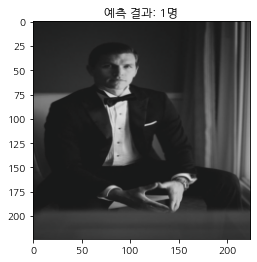

[예측 결과: 1명] (실제 정답: 2명)


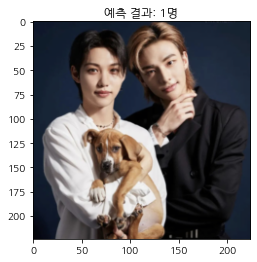

[예측 결과: 2명] (실제 정답: 2명)


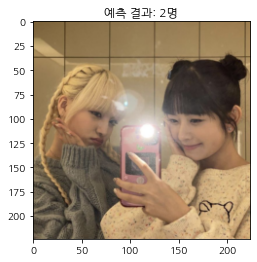

[예측 결과: 단체] (실제 정답: 단체)


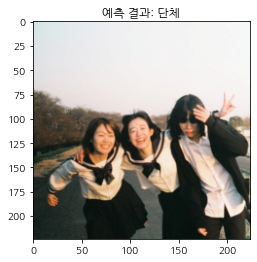

[Test Phase] Loss: 0.5869 Acc: 73.3333% Time: 5.9821s


In [ ]:
model.eval()
start_time = time.time()

with torch.no_grad():
    running_loss = 0.
    running_corrects = 0

    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

        # 한 배치의 첫 번째 이미지에 대하여 결과 시각화
        print(f'[예측 결과: {class_names[preds[0]]}] (실제 정답: {class_names[labels.data[0]]})')
        imshow(inputs.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    epoch_loss = running_loss / len(test_datasets)
    epoch_acc = running_corrects / len(test_datasets) * 100.
    print('[Test Phase] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch_loss, epoch_acc, time.time() - start_time))

#### <b>3. 분류 모델 API 개발</b>

* 학습된 분류 모델을 다른 사람이 사용할 수 있도록 API를 개발하여 배포합니다.
* 먼저 한 장의 이미지를 파일로부터 읽어와 분류 결과를 반환하는 기능을 작성합니다.

In [ ]:
# 테스트용 이미지 다운로드하기
!wget https://i.pinimg.com/originals/73/58/0e/73580e54dfd5b264961ab5be1af21df6.jpg -O test_image.jpg

--2023-02-08 13:02:22--  https://i.pinimg.com/originals/73/58/0e/73580e54dfd5b264961ab5be1af21df6.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.11.229.224, 23.11.229.178, 2600:1408:c400:11::17cd:6b49, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.11.229.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 265243 (259K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>] 259.03K  --.-KB/s    in 0.08s   

2023-02-08 13:02:23 (3.23 MB/s) - ‘test_image.jpg’ saved [265243/265243]



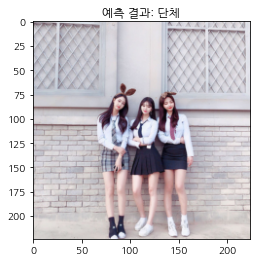

In [ ]:
from PIL import Image


image = Image.open('test_image.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

* 웹 API 개방을 위해 <b>Ngrok</b> 서비스를 이용합니다.
* API 기능 제공을 위해 <b>Flask 프레임워크</b>를 사용합니다.

In [ ]:
# 필요한 라이브러리 설치하기
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install flask-ngrok2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyngrok==4.1.1
!ngrok authtoken '2IU9g5AthYgGQCVAoTYbpZDEmdl_5RCH17Wj1bp8TJCXAHNHF'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15982 sha256=2c1a08465fbc83fe0c64a789c6ebb3844a5868887c119d44d3e648363668abd9
  Stored in directory: /root/.cache/pip/wheels/5e/0a/51/8cb053ccd84481dd3233eba4cdb608bc7a885fd8ca418c0806
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
import io
from pyngrok import ngrok
from flask_ngrok2 import run_with_ngrok
from flask import Flask, jsonify, request


# 이미지를 읽어 결과를 반환하는 함수
def get_prediction(image_bytes):
    image = Image.open(io.BytesIO(image_bytes))
    image = transforms_test(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)
        imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])

    return class_names[preds[0]]


app = Flask(__name__)


@app.route('/', methods=['POST'])
def predict():
    if request.method == 'POST':
        # 이미지 바이트 데이터 받아오기
        file = request.files['file']
        image_bytes = file.read()

        # 분류 결과 확인 및 클라이언트에게 결과 반환
        class_name = get_prediction(image_bytes=image_bytes)
        print("결과:", {'class_name': class_name})
        return jsonify({'class_name': class_name})

In [ ]:
# run_with_ngrok(app=app, auth_token='2HJSgyuVEuWE6cQP8KhrNL9f8gh_65Ry8EUC2JHsGVsRhCVa2')
run_with_ngrok(app=app)
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://dc4c5d0345d6.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


#### ngrok & flask 설정 (미사용)


In [ ]:
!ngrok http --region=ap --hostname=expose.ap.ngrok.io 80

In [ ]:
!pip install colab-ssh

In [ ]:
NGROK_TOKEN = '2HJSgyuVEuWE6cQP8KhrNL9f8gh_65Ry8EUC2JHsGVsRhCVa2' 
PASSWORD = '1234'

In [ ]:
from colab_ssh import launch_ssh
launch_ssh(NGROK_TOKEN, PASSWORD)

* API를 개방할 수 있으며 실행할 때마다 서버의 주소가 변경됩니다.
* 서버 주소를 정확히 확인할 필요가 있습니다.

In [ ]:
# authtoken 설정하기
!ngrok authtoken 2HJSgyuVEuWE6cQP8KhrNL9f8gh_65Ry8EUC2JHsGVsRhCVa2

#### Github


In [ ]:
!git config --global user.email "yoonjeongin@naver.com"

In [ ]:
!git commit -m "[FEAT] 이미지 수집을 위한 크롤링 추가"

In [ ]:
!ngrok authtoken 2HJSgyuVEuWE6cQP8KhrNL9f8gh_65Ry8EUC2JHsGVsRhCVa2

#### 클라이언트 테스트

* 클라이언트 테스트 방법

<pre>
curl -X POST -F file=@{이미지 파일명} {Ngrok 서버 주소}
</pre>

* 사용 예시

<pre>
curl -X POST -F file=@dongseok.jpg http://c4cdb8de3a35.ngrok.io/
</pre>

* 이러한 방식으로 웹, 모바일, 게임 등의 소프트웨어 환경에서 API를 호출하는 방식으로 인공지능 앱을 개발할 수 있습니다.